# INTRO

We will work on adult.csv data from kaggle resources.

Our main data will be the income column for the year.

### Dependencies to analyze
We will look for the following relationships:

1. __Age__ and Income level (>50K or ≤50K): Are older people more likely to have higher incomes?
2. __Hours per Week__ versus income: Do people who work more hours earn higher incomes?
3. __Education__ and income: Does a higher level of education correlate with higher earnings?
4. __Gender__ and income: Are there gender differences in income?
5. __Marital Status__ and income: Do married people earn more than single people?

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
# load dataset from csv
df = pd.read_csv('../adult_projects/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
# shape of dataset
df.shape

(32561, 15)

In [5]:
# overall info of columns from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# dataset description
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# looking for NaN values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
# looking for uncorrect values in dataset
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

## DATA CLEANING

Our dataset has many special characters like "?". The data will be cleaned from the indicated character and then the indexes will be restarted to their initial values

In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
# change ? on NaN
df.replace('?', np.nan, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
# shape of dataset
df.shape

(32561, 15)

In [11]:
# remove NaN from dataset
df.dropna(inplace=True)
# reset indexes and remove previous index column
df.reset_index(drop=True, inplace=True)
# once again check size of dataset
df.shape

(30162, 15)

In [12]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


## DATA RESTRUCTURISATION

To restructure the data, we will create a universal function that will add appropriately grouped data from the indicated columns to the existing table (in our case, the age group and hours.per.week)

We will also add an income_numeric column, for people earning over >50K per year we will set the value to 1 and for people earning <50K we will add the value 0

In [13]:
def add_group_column(col_name, agg_name, bins, labels):
    df[col_name] = pd.cut(df[agg_name], bins=bins, labels=labels, right=True)
    

In [14]:
# add into dataset a column income_numeric 
df['income_numeric'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
df[['income', 'income_numeric']].value_counts()

income  income_numeric
<=50K   0                 22654
>50K    1                  7508
Name: count, dtype: int64

In [15]:
# adding a column containing age ranges age_groups into dataset
bins = [0, 20, 30 , 40, 50, 60, 70, 80, 90]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

add_group_column('age_groups', 'age', bins, labels)

df['age_groups'].value_counts()

age_groups
30-40    8163
20-30    7599
40-50    6710
50-60    3886
0-20     1998
60-70    1422
70-80     309
80-90      75
Name: count, dtype: int64

In [16]:
# checking data type for age_groups
df['age_groups'].dtype

CategoricalDtype(categories=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80',
                  '80-90'],
, ordered=True)

In [17]:
# adding a column containing hours per week ranges into dataset
bins = [0, 20, 35, 40, 50, 70, 100]
labels = ['0-20','21-35','36-40','41-50','51-70','71-100']
add_group_column('hours_per_week_groups', 'hours.per.week', bins, labels)

df['hours_per_week_groups'].value_counts()

hours_per_week_groups
36-40     15091
41-50      5722
21-35      3486
51-70      3015
0-20       2388
71-100      460
Name: count, dtype: int64

In [18]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_numeric,age_groups,hours_per_week_groups
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,80-90,0-20
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,50-60,36-40
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0,40-50,36-40
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,30-40,41-50
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,30-40,36-40


The division of labor has been developed as follows:
- <20 hours: minimum part-time work (students, freelancers)
- 20-35 hours: part-time
- 36-40 hours: full-time
- 41-50 hours: full-time with moderate overtime
- 51-60 hours: intensive overtime
- over 60 hours: extreme overtime

Our data is cleaned and properly formatted for further work, we can now save it

## Save prepared data

We save the appropriately formatted data to a new csv file

In [19]:
df.to_csv('../adult_projects/adult_prepared.csv', index=False, sep=';')

## FEATURE ENGINEERING

Feature engineering contain prepare two universal functions:
- column_analyse: for aggregate most important numeric calculations
- visualize_analysis: for visualization results on plots

In [20]:
# load prepared dataset
df = pd.read_csv('../adult_projects/adult_prepared.csv', sep=';')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_numeric,age_groups,hours_per_week_groups
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,80-90,0-20
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,50-60,36-40
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0,40-50,36-40
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,30-40,41-50
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,30-40,36-40


In [21]:
# describe dataset
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income_numeric
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


We will create a universal function which will take a income numeric table and based on that income we compare mean, count, people earn over 50K and deviation from the global average

In [22]:
def column_analyse(df, col_name):
    result = df.groupby(by=[col_name])['income_numeric'].agg([
        'mean',                                                   # mean number of people earning >50K
        'count',                                                  # size of group
        'std',                                                    # standard deviation
        lambda x: sum(1-x),                                       # mean number of people earning <50K
        lambda x: sum(x) / len(x) - df['income_numeric'].mean()   # deviation from global average
    ])
    
    result.columns=[
        "High_Income_Ratio",
        "Group_Size",
        "Standard_Deviation",
        "Low_Income_Amount",
        "Deviation_From_Global"
    ]
    
    return result

Universal function which will create a visualisation of our analysis

In [23]:
def visualize_analysis(df, compare_value, group_name):
    
    x = df.index.astype(str)
    y_ratio = df['High_Income_Ratio']
    y_size = df['Group_Size']
    
    # create charts
    fig, ax1 = plt.subplots(figsize=(14,6))
    
    
    # high income ratio
    ax1.bar(x, y_ratio, color='skyblue', alpha=0.7, label='High Income Ratio')
    ax1.set_xlabel('Group')
    ax1.set_ylabel('High Income Ratio', color='blue')
    ax1.set_title(f'High Income Ratio and Group Size by {group_name}')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    ax1.axhline(compare_value, color='red', linestyle='--', linewidth=2, label='Global Average Ratio')
    
    # Group Size
    ax2 = ax1.twinx()
    
    ax2.plot(x, y_size, color='green', linestyle='-', marker='o', linewidth=2, label='Group Size')
    ax2.set_ylabel('Group Size', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    
    
    # legend
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    plt.show()
 

Setting the global mean of income based on income_numeric column

In [24]:
global_mean = df['income_numeric'].mean().round(3)
global_mean

0.249

## DATA ANALYSIS

Now we will start analize our dataset based on cleaned and correct prepared adult.csv file (adult_prepared.csv)

### 1. Age and Income level (>50K or ≤50K): Are older people more likely to have higher incomes?

In [25]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_numeric,age_groups,hours_per_week_groups
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,80-90,0-20
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,50-60,36-40
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0,40-50,36-40
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,30-40,41-50
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,30-40,36-40


In [26]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income_numeric
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


## Age_groups

In [28]:
age_analisys = column_analyse(df, 'age_groups')
age_analisys

,High_Income_Ratio,Group_Size,Standard_Deviation,Low_Income_Amount,Deviation_From_Global
age_groups,,,,,
0-20,0.000501,1998,0.022372,1997,-0.248422
20-30,0.086854,7599,0.281639,6939,-0.162069
30-40,0.286292,8163,0.452055,5826,0.037369
40-50,0.384799,6710,0.486584,4128,0.135876
50-60,0.379825,3886,0.485406,2410,0.130903
60-70,0.265823,1422,0.441926,1044,0.016900
70-80,0.200647,309,0.401134,247,-0.048275
80-90,0.160000,75,0.369075,63,-0.088922


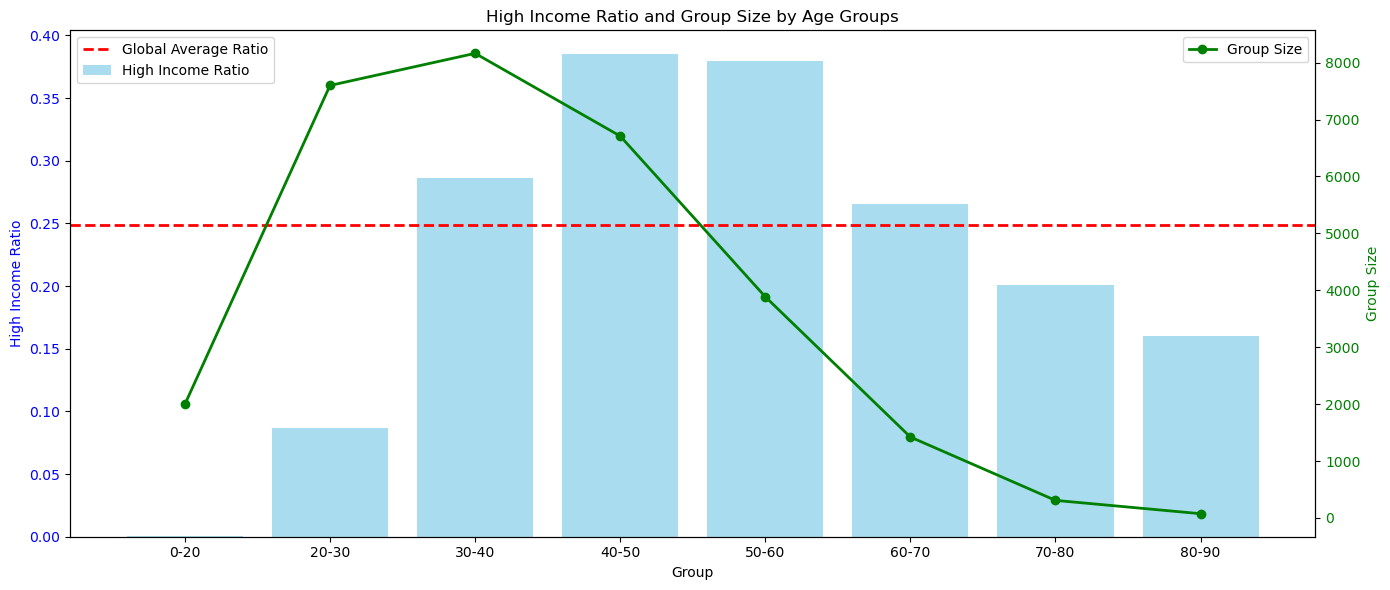

In [29]:
visualize_analysis(age_analisys, global_mean, 'Age Groups')

Analisys:

#### 1. High Income Ratio:
- Younger Age Groups (0-20, 20-30): The ratio of incomes above 50K is low (below the global average, marked by the red line). This is understandable, as young people are often just starting their careers and earnings are limited.
- Age Groups in the 30-60 range: The highest ratio of incomes above 50K is found in the 40-50 age group, suggesting that people in this age group are reaching the peak of their careers and thus have higher earnings.
- Older Age Groups (60-90): The ratio decreases with age above 50, which may be related to retirement or reduced labor force participation.
#### 2. Group Size:
- The largest age groups are 30-40, 20-30 and 40-50, indicating that people of working age are the dominant part of the population in this dataset.
- Older age groups (70-90) are smaller, suggesting that people of this age group are underrepresented in the data.
#### 3. Global average (red line):
- The age groups 30-40, 40-50, and 50-60 exceed the global average of the above 50K income ratio, indicating that these groups are more likely to have higher earnings. The range covers the productive age and have __coleration with income__
- All other groups are below the global average.

#### Conclusions
1. Chance for high income:
- People aged 30-60 are most likely to earn >50K.
- Older people (60+) have lower chances for high earnings, which may be related to health limitations, retirement or lower professional activity.

2. Importance of age for income:
- Age is a significant factor determining the level of income. Younger and older age groups have significantly lower rates of >50K income compared to middle-aged people.

3. Population distribution:
- The largest number of people in the dataset are in the age groups of 30-50, which also affects the overall result of the analysis.

### Test Chi-Square

Test Chi-Square used to analye the relationship between qualitative (categorical) variables. In this case, we analyze whether there is a relationship between age group and income level (<=50K or >50K). The hypotheses in such a test are:
- Null hypothesis __(H0)__: age group is independent from income level
- Alternative hypothesis __(Ha)__: age group is dependent of income level

If the p-value of the test is less than the assumed significance level (0.05), we reject the null hypothesis, which suggests a relationship between the variables being tested.

We looking for the solution of:
1. __Age__ a Income level (>50K or ≤50K): Are older people more likely to have higher incomes?


In [30]:
# for that we need to create a crosstab for age groups and income
contingency_table = pd.crosstab(df['age_groups'], df['income_numeric'])
contingency_table

income_numeric,0,1
age_groups,,
0-20,1997,1
20-30,6939,660
30-40,5826,2337
40-50,4128,2582
50-60,2410,1476
60-70,1044,378
70-80,247,62
80-90,63,12


In [31]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi Squared Value: ', chi2)
print('P-Value: ', p_value)
print('Degrees of Freedom: ', dof)

Chi Squared Value:  2816.0617957143854
P-Value:  0.0
Degrees of Freedom:  7


Analyze results:

1. Chi Squared Value: The value __2816.06__ indicates a large difference between the observed and expected values.
2. P-Value: it is much smaller than the typical significance level (0.05) which means that we have strong grounds to reject the null hypothesis. 

Conclusion: __There is a statistically significant relationship between age group and income level.__

Explanation:
- The Chi-square test is sensitive to small values in the observed data because these values can lead to overweighting of large differences between observed and expected values. This can artificially inflate the value of the Chi-square statistic.
- Expected values in each cell should be greater than 5

That's why the dominance of one group may couse test results to reflect the influence of the larger group rather than necessarily the true relationship.

In this case we will use another model, __Logistic Regression__

### Logistic Regression

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# preparing data
X = pd.get_dummies(df['age_groups'], drop_first=True)  # One-hot encoding age_groups
y = df['income_numeric']  # Income (0 - under 50K, 1 - over 50K)

# Division into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# prediction on the test set
y_pred = logreg.predict(X_test)

# model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Roc AUC (if binary classification)
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)


Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4533
           1       0.00      0.00      0.00      1500

    accuracy                           0.75      6033
   macro avg       0.38      0.50      0.43      6033
weighted avg       0.56      0.75      0.64      6033

Accuracy Score: 0.7513674788662357
ROC AUC Score: 0.6934804765056255


/Users/tymoteuszhuba/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tymoteuszhuba/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tymoteuszhuba/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Analyze:

1. Precision:
- Group 0 (income under 50K): 0.75 means 0.75% of class 0 predicted results were correct 
- Group 1 (income over 50K): 0.00 the model didn't correctly predict any case for class 1
2. Recall:
- Group 0 (income under 50K): 1.00 the model correctly identified all class 0 cases
- Group 1 (income over 50K): 0.00 the model didn't detect any class 1 cases.
3. F1 Score:
- Group 0 (income under 50K): The harmonious average of precision and sensitivity indicates that the model performs very well in predicting class 0.
- Group 1 (income over 50K): brak poprawnych przewidywań dla klasy 1.
4. Accuracy score: 
- 0.75 – the model correctly predicted 75% of cases. However, high accuracy can be deceptive, because it is mainly due to the dominance of class 0 (uneven data distribution).
5. ROC AUC Score:
- Result: 0.693 – the area under the ROC curve shows that the model distinguishes classes 0 and 1 slightly better than random guessing (0.5), but the result is far from perfect (1.0)

#### MAIN PROBLEM:
Ineffectiveness in predicting income >50K:
- The model fails to identify cases of people earning more than 50K. This indicates that age groups alone as a feature (after one-hot encoding) are not enough to effectively predict this category.

### RANDOM FOREST

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# preparing data (coding One-hot)
X = pd.get_dummies(df['age_groups'], drop_first=True)
y = df['income_numeric']  # Dochód (0 - poniżej 50K, 1 - powyżej 50K)

# Division into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create model Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# prediction on the test set
y_pred = rf.predict(X_test)

# model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.41      0.57      4533
           1       0.34      0.90      0.49      1500

    accuracy                           0.53      6033
   macro avg       0.63      0.66      0.53      6033
weighted avg       0.78      0.53      0.55      6033

Accuracy Score: 0.5304160450853639
ROC AUC Score: 0.6934804765056255


Analyze:

1. Precision:
- Group 0 (income <=50K): 0.93 – high precision means that predictions for class 0 are mostly correct.
- Group 1 (income >50K): 0.34 – only 34% of predictions for class 1 are correct.

2. Recall:
- Group 0: 0.41 – the model identified only 41% of class 0 cases.
- Group 1: 0.90 – the model identifies class 1 cases very well, which is a significant improvement over logistic regression.

3. F1-Score:
- Group 0: 0.57 – the average precision and sensitivity for class 0 indicates moderate performance. 
- Group 1: 0.49 – a similar result for class 1, suggesting some improvement in balancing results between classes.

4. Accuracy Score:
- Score: 0.53 – very low, indicating limited overall model performance. This score is the result of a trade-off between classes (the model tries to balance precision and sensitivity for both classes).

5. ROC AUC Score: 
- Result: 0.693 – similar to the result of logistic regression, which indicates that the model's ability to distinguish between classes (0 and 1) is limited.

#### CONCLUSION:

The Random Forest model is just little better than Logistic Regression but to make more detailed preparation of models we need more details like workclass, hours.per.week etc. That's why we will create models at the end of the project for all dataset.

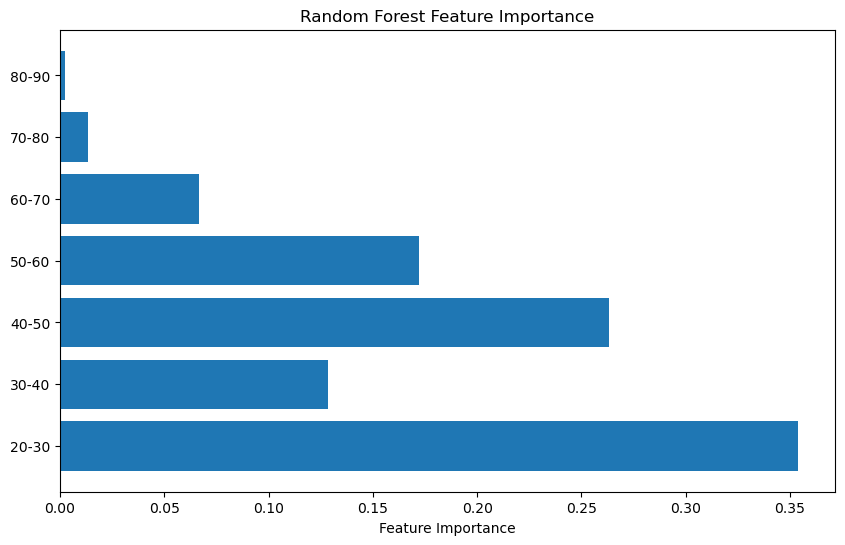

In [29]:
# Feature Importance (importance of features)
import matplotlib.pyplot as plt
feature_importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

Analyze:

Plot above shows the importance of features for a given age group. 
1. The greatest importance of features for the age group 20-30:
- The age group of 20-30 has the highest weight in the model. This means that age in this category is the most important in determining the level of income (whether it is more than 50K or less). 
- This is in line with market observations that people in this group may be at the beginning of their careers and their income may vary significantly depending on the industry and experience.

2. Significant importance of the 40-50 group:
- The age group of 40-50 is the second most important predictor. At this age, people tend to be most financially stable or have an advanced professional position, which can lead to more pronounced income differences.

3. Average significance for groups 30-40 and 50-60:
- The age groups 30-40 and 50-60 have moderate weight. This suggests that these groups also contribute important information, but their influence is not as dominant as the two groups mentioned earlier.